# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [66]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import sys
from scipy.stats import linregress
from scipy import stats


# Import API key
from api_keys_weather import weather_api_key

#URL for weather
url  = "http://api.openweathermap.org/data/2.5/weather?q="
apikey = "&APPID="+weather_api_key
units = "&units=imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
sizes = 1500

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=sizes)
lngs = np.random.uniform(low=-180.000, high=180.000, size=sizes)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
responses = []
weatherdatas = []
locdatas = []
clouddatas = []
winddatas = []
legitcit = []
alldata = []
y=1

for x in cities :
    response = requests.get(url + x + apikey + units)
    if response.status_code != 404: 
        responses.append(response)
        legitcit.append(x)
    print(f"City Number = {y}, City = {x}")
    y = y + 1

print("DONE GATHERING")
    
for x in responses :
    data = x.json()
    alldata.append(data)
    weatherdatas.append(data['main'])
    locdatas.append(data['coord'])
    clouddatas.append(data['clouds'])
    winddatas.append(data['wind'])
    


DONE GATHERING


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
temp = []
pressure = []
humidity = []
temp_min = []
temp_max = []
lat = []
clouds = []
wind = []
dfcit = []
y=0
for x in weatherdatas:
    temp.append(weatherdatas[y]['temp'])
    pressure.append(weatherdatas[y]['pressure'])
    humidity.append(weatherdatas[y]['humidity'])
    temp_min.append(weatherdatas[y]['temp_min'])
    temp_max.append(weatherdatas[y]['temp_max'])
    clouds.append(clouddatas[y]['all'])
    lat.append(locdatas[y]['lat'])
    wind.append(winddatas[y]['speed'])
    y=y+1
    
dfcit = pd.DataFrame(legitcit)
dfcit = dfcit.rename(columns={ 0 : "Cities"})
dfcit["Latitude"] = lat
dfcit["Temperature (F)"] = temp
dfcit["Pressure"] = pressure
dfcit["Humidity (%)"] = humidity
dfcit["Minimum Temperature (F)"] = temp_min
dfcit["Maximum Temperature (F)"] = temp_max
dfcit["Cloud Coverage (%)"] = clouds
dfcit["Wind Speed (mph)"] = wind

dfcit.head()

,Cities,Latitude,Temperature (F),Pressure,Humidity (%),Minimum Temperature (F),Maximum Temperature (F),Cloud Coverage (%),Wind Speed (mph)
0,nome,30.04,77.40,1012.0,88,75.0,80.60,90,8.05
1,hilo,19.71,77.56,1014.0,58,66.0,86.00,75,11.41
2,kaeo,-35.10,65.35,1027.0,84,64.0,66.99,95,2.82
3,cabo san lucas,22.89,87.75,1011.0,55,84.0,91.00,5,13.87
4,ushuaia,-54.81,39.20,995.0,80,39.2,39.20,40,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

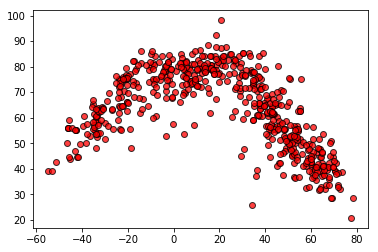

In [29]:
plt.scatter(dfcit['Latitude'], dfcit['Temperature (F)'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)


#### Latitude vs. Humidity Plot

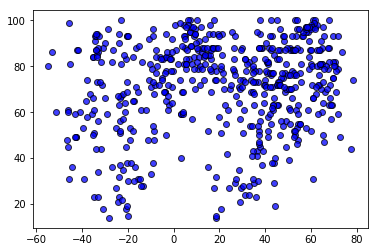

In [30]:
plt.scatter(dfcit['Latitude'], dfcit['Humidity (%)'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)


#### Latitude vs. Cloudiness Plot

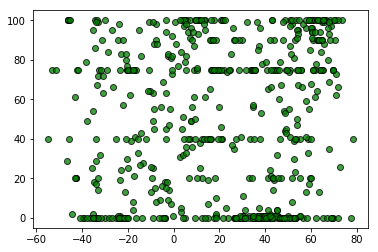

In [31]:
plt.scatter(dfcit['Latitude'], dfcit['Cloud Coverage (%)'], marker="o", facecolors="green", edgecolors="black", alpha=0.75)


#### Latitude vs. Wind Speed Plot

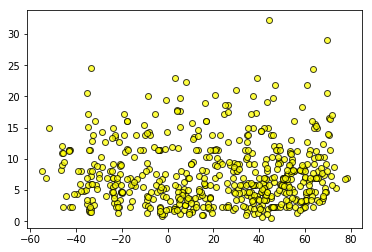

In [34]:
plt.scatter(dfcit['Latitude'], dfcit['Wind Speed (mph)'], marker="o", facecolors="yellow", edgecolors="black", alpha=0.75)

## Linear Regression

In [35]:
# Create Northern and Southern Hemisphere DataFrames
north = dfcit.loc[dfcit["Latitude"] > 0]
south = dfcit.loc[dfcit["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is -0.8327508664572677


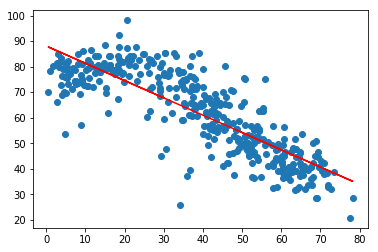

In [44]:
slope, intercept, r_value, p_value, std_err = stats.linregress(north['Latitude'], north['Temperature (F)'])
regress_values = north['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north['Latitude'],north['Temperature (F)'])
plt.plot(north['Latitude'],regress_values,"r-")
print(f"The R Value is {r_value}")
plt.savefig("Northern_Lats_vs_Max_Temp.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is 0.7712065610093427


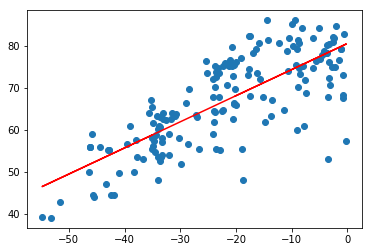

In [45]:
slope, intercept, r_value, p_value, std_err = stats.linregress(south['Latitude'], south['Temperature (F)'])
regress_values = south['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south['Latitude'],south['Temperature (F)'])
plt.plot(south['Latitude'],regress_values,"r-")
print(f"The R Value is {r_value}")
plt.savefig("Southern_Lats_vs_Max_Temp.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is -0.03197863657066127


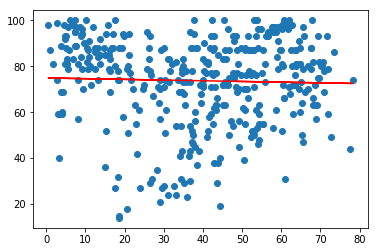

In [46]:
slope, intercept, r_value, p_value, std_err = stats.linregress(north['Latitude'], north['Humidity (%)'])
regress_values = north['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north['Latitude'],north['Humidity (%)'])
plt.plot(north['Latitude'],regress_values,"r-")
print(f"The R Value is {r_value}") 
plt.savefig("Northern_Lats_vs_Humidity.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is 0.12634260957739474


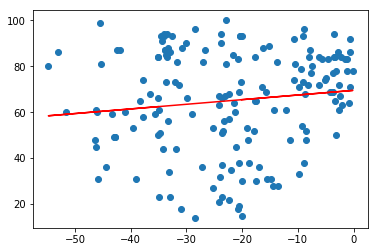

In [47]:
slope, intercept, r_value, p_value, std_err = stats.linregress(south['Latitude'], south['Humidity (%)'])
regress_values = south['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south['Latitude'],south['Humidity (%)'])
plt.plot(south['Latitude'],regress_values,"r-")
print(f"The R Value is {r_value}")
plt.savefig("Southern_Lats_vs_Humidity.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is 0.054315205985834135


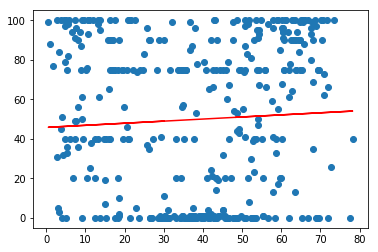

In [48]:
slope, intercept, r_value, p_value, std_err = stats.linregress(north['Latitude'], north['Cloud Coverage (%)'])
regress_values = north['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north['Latitude'],north['Cloud Coverage (%)'])
plt.plot(north['Latitude'],regress_values,"r-")
print(f"The R Value is {r_value}") 
plt.savefig("Northern_Lats_vs_Cloudiness.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is -0.021251234607266224


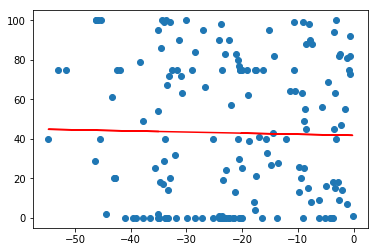

In [49]:
slope, intercept, r_value, p_value, std_err = stats.linregress(south['Latitude'], south['Cloud Coverage (%)'])
regress_values = south['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south['Latitude'],south['Cloud Coverage (%)'])
plt.plot(south['Latitude'],regress_values,"r-")
print(f"The R Value is {r_value}")
plt.savefig("Southern_Lats_vs_Cloudiness.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is 0.07950382713068498


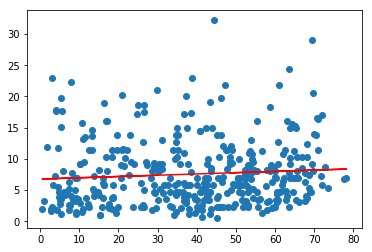

In [52]:
slope, intercept, r_value, p_value, std_err = stats.linregress(north['Latitude'], north['Wind Speed (mph)'])
regress_values = north['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north['Latitude'],north['Wind Speed (mph)'])
plt.plot(north['Latitude'],regress_values,"r-")
print(f"The R Value is {r_value}") 
plt.savefig("Northern_Lats_vs_Wind_Speed.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is -0.06063116405661402


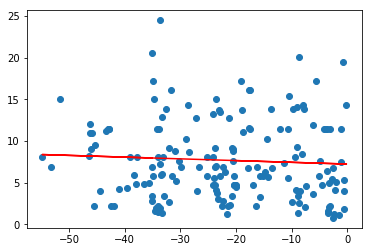

In [53]:
slope, intercept, r_value, p_value, std_err = stats.linregress(south['Latitude'], south['Wind Speed (mph)'])
regress_values = south['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south['Latitude'],south['Wind Speed (mph)'])
plt.plot(south['Latitude'],regress_values,"r-")
print(f"The R Value is {r_value}") 
plt.savefig("Southern_Lats_vs_Wind_Speed.png")


In [77]:
dfcit.to_csv (output_data_file, index = None, header=True)